# Анализ отзывов на банки

В данных представлены отзывы на банки с сайта [banki.ru](https://www.banki.ru/)
- body - сам отзыв
- title - название отзыва
- rating - оценка по отзыву, варьируется от 1 до 5
- bank_name - название банка
- date - дата публикации отзыва

Необходимо EDA (Exploratory Data Analysis) по этим данным и сделать несколько выводов (приветствуются визуализации):
- назвать топ-15 банков по числу отзывов
- какой банк из числа топ-15 по отзывов имеет самый высокий средний рейтинг?
- сделать выводы об изменении среднего рейтинга банков по месяцам из топ-5 банков по числу отзывов
- нет ли в данных в целом каких-то странностей на ваш взгляд?
- дополнительный EDA на ваше усмотрение, возможные интересные наблюдения

Необходимо выбрать метрику и построить бинарный классификатор отзывов, добившись при этом лучшей метрики на валидационной выборке (отзывы >=3 считать положительными, <3 - отрицательными)

Будет плюсом визуализация результатов работы модели (ответ на вопрос: почему построенная модель считает этот отзыв положительным или отрицательным?)

In [1]:
# Импортируем pandas и глушим предупреждения
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Кладем в переменную путь к данным относительно этого ноутбука 
import os
fpath = os.path.join('data', 'data.csv.gz')
fpath

'data\\data.csv.gz'

In [564]:
# Читаем данные из таблицы в архиве в датафрейм
import gzip
with gzip.open(fpath, 'r') as f_in:
    df = pd.read_csv(f_in)
df.head()

,body,title,rating,bank_name,date
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03 12:46:11
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03 12:23:11
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03 12:12:36


## Exploratory Data Analysis

In [ ]:
# ! pip install seaborn

In [157]:
# ! pip install matplotlib --upgrade

In [4]:
# Импортируем библиотеки для визуализации и настраиваем тему
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid") # white, dark, whitegrid, darkgrid, ticks
sns.set_color_codes("muted")

In [5]:
# Проверяем, везде ли есть данные и смотрим на типы данных (в ячейке ниже)
df.describe(include='all')

,body,title,rating,bank_name,date
count,92735,92735,92735.000000,92735,92735
unique,91832,54505,NaN,157,91059
top,&lt;p&gt;Что мне больше всего нравится в банке...,Благодарность,NaN,Тинькофф Банк,2022-10-28 15:57:44
freq,33,2051,NaN,44864,4
mean,NaN,NaN,4.064086,NaN,NaN
std,NaN,NaN,1.620702,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92735 entries, 0 to 92734
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   body       92735 non-null  object
 1   title      92735 non-null  object
 2   rating     92735 non-null  int64 
 3   bank_name  92735 non-null  object
 4   date       92735 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


In [75]:
# pd.set_option('display.max_colwidth', 50)

### Топ-15 банков по числу отзывов

Ответ:
```
15 банков с наибольшим количеством отзывов (по убыванию):
1.  Тинькофф Банк
2.  Хоум Кредит Банк
3.  Совкомбанк
4.  ВТБ
5.  СберБанк
6.  Альфа-Банк
7.  Россельхозбанк
8.  Банк Открытие
9.  МТС Банк
10.  Модульбанк
11.  Газпромбанк
12.  Московский Кредитный Банк
13.  Азиатско-Тихоокеанский Банк
14.  Уральский Банк Реконструкции и Развития
15.  Русский Стандарт
```

In [44]:
# Считаем количество отзывов для каждого банка, 
# сортируем получившийся список по убыванию количества отзывов 
# и просим отобразить только 15 первых позиций

top_15 = df.groupby(['bank_name'])['rating'].count().sort_values(ascending=False)[:15] # Список топ-15 банков по кол-ву отзывов
top_15

bank_name
Тинькофф Банк                              44864
Хоум Кредит Банк                            9310
Совкомбанк                                  6111
ВТБ                                         3817
СберБанк                                    3490
Альфа-Банк                                  3369
Россельхозбанк                              3064
Банк Открытие                               1894
МТС Банк                                    1542
Модульбанк                                  1460
Газпромбанк                                 1314
Московский Кредитный Банк                   1251
Азиатско-Тихоокеанский Банк                 1001
Уральский Банк Реконструкции и Развития      748
Русский Стандарт                             689
Name: body, dtype: int64

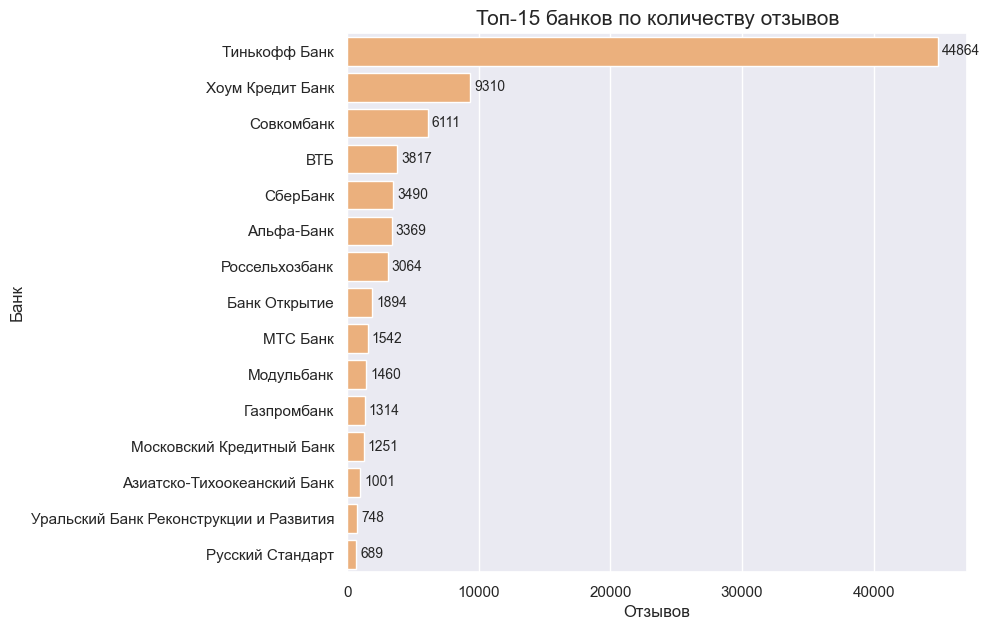

In [9]:
# Делаем визуализацию списка выше 
# и видим, что у банка Тинькофф очень большой отрыв в количестве отзывов 
# от следующего по списку Хоум Кредит Банка

f, ax = plt.subplots(figsize=(8, 7))
ax = sns.barplot(x=top_15.values, y=top_15.index, color="#fdae6b")
ax.bar_label(ax.containers[0], fontsize=10, padding=3) # Добавляем подписи к столбцам
ax.set_title('Топ-15 банков по количеству отзывов', fontdict = { 'fontsize': 15}); # Добавляем название чарта
ax.set(xlabel='Отзывов', ylabel='Банк'); # Переименовываем оси

⚠ У Тинькофф Банк очень большой перевес в количестве отзывов. Анализ оценок приведен в блоке [Дополнительный EDA](#Дополнительный-EDA)

### Какой банк из числа топ-15 по отзывам имеет самый высокий средний рейтинг?

Ответ:
```
Самый высокий средний рейтинг имеет Тинькофф банк: у него этот показатель равен 4.78/5
```

In [10]:
# Берем данные только по тем банкам, которые вошли в предыдущий топ-15,
# вычисляем средний рейтинг для каждого из них, 
# сортируем по убыванию показателя и выводим только первую позицию

top_15_mask = df['bank_name'].isin(top_15.index) # Маска, чтобы оставить данные только о банках в топе
df[top_15_mask].groupby(['bank_name'])['rating'].mean().sort_values(ascending=False)[:1]

bank_name
Тинькофф Банк    4.783568
Name: rating, dtype: float64

In [11]:
# Из любопытства смотрим средние рейтинги для всех банков из топа
df[top_15_mask].groupby(['bank_name'])['rating'].mean().sort_values(ascending=False)

bank_name
Тинькофф Банк                              4.783568
Модульбанк                                 4.780137
Азиатско-Тихоокеанский Банк                4.718282
Хоум Кредит Банк                           4.505585
Россельхозбанк                             4.455940
Совкомбанк                                 4.264768
Московский Кредитный Банк                  4.241407
Русский Стандарт                           4.158200
Банк Открытие                              3.543295
Уральский Банк Реконструкции и Развития    3.298128
МТС Банк                                   2.901427
СберБанк                                   2.303725
Газпромбанк                                2.145358
ВТБ                                        1.950223
Альфа-Банк                                 1.714159
Name: rating, dtype: float64

### Сделать выводы об изменении среднего рейтинга банков по месяцам из топ-5 банков по числу отзывов

Ответ:
```
На протяжении всего рассматриваемого периода средний рейтинг Тинькофф Банка, Совкомбанка и Хоум Кредит Банка был положительным и колебался от ~3.5 до ~5. Средний рейтинг Сбербанка и ВТБ был между 2 и 3. Данные за январь 2023 предлагаю не брать в расчет, т.к. метрика еще не "созрела" за этот месяц: отзывы в датасете только за первые три дня месяца
```

In [12]:
# Заводим отдельный датафрейм для 5 банков с наибольшим количеством отзывов

top_5 = top_15[:5] 
top_5_df = df[df['bank_name'].isin(top_5.index)]
top_5_df.head()

,body,title,rating,bank_name,date
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07
6,&lt;p&gt;Самый худший банк в стране!!! Сотрудн...,Мошенники,1,ВТБ,2023-01-03 12:04:02
8,&lt;p&gt;Мне очень понравился тинькофф и как о...,Хороший банк,5,Тинькофф Банк,2023-01-03 11:58:32
9,"&lt;p&gt;В декабре уже было написано, что 512 ...",Глюченный банк,1,Хоум Кредит Банк,2023-01-03 11:47:17


In [13]:
# Создаем столбец, где хранится дата отзыва, округленная до месяца.
# Он поможет нам аггрегировать данные по месяцам

top_5_df['year_month'] = pd.to_datetime(top_5_df['date']).astype('datetime64[M]').dt.strftime('%Y-%m-%d')
top_5_df.head()

,body,title,rating,bank_name,date,year_month
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46,2023-01-01
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07,2023-01-01
6,&lt;p&gt;Самый худший банк в стране!!! Сотрудн...,Мошенники,1,ВТБ,2023-01-03 12:04:02,2023-01-01
8,&lt;p&gt;Мне очень понравился тинькофф и как о...,Хороший банк,5,Тинькофф Банк,2023-01-03 11:58:32,2023-01-01
9,"&lt;p&gt;В декабре уже было написано, что 512 ...",Глюченный банк,1,Хоум Кредит Банк,2023-01-03 11:47:17,2023-01-01


In [14]:
# Создаем датафрейм, куда мы положим средние оценки для каждого банка за каждый месяц

working_df = pd.DataFrame(top_5_df.groupby(['bank_name', 'year_month'])['rating'].mean()).reset_index()
working_df

,bank_name,year_month,rating
0,ВТБ,2022-09-01,2.073814
1,ВТБ,2022-10-01,1.914620
2,ВТБ,2022-11-01,1.993778
3,ВТБ,2022-12-01,1.896052
4,ВТБ,2023-01-01,1.148148
5,СберБанк,2022-09-01,1.920000
6,СберБанк,2022-10-01,2.777547
7,СберБанк,2022-11-01,2.562708
8,СберБанк,2022-12-01,1.868263
9,СберБанк,2023-01-01,1.400000


In [15]:
# Сколько отзывов получилось собрать в каждом месяце для всех банков?

pd.to_datetime(df['date']).astype('datetime64[M]').dt.strftime('%Y-%m-%d').value_counts()

2022-12-01    28882
2022-11-01    27509
2022-10-01    27291
2022-09-01     8691
2023-01-01      362
Name: date, dtype: int64

In [16]:
print('Дата первого отзыва: ' + min(df['date']), 'Дата последнего отзыва: ' + max(df['date']), sep='\n')

Дата первого отзыва: 2022-09-02 11:28:11
Дата последнего отзыва: 2023-01-03 12:46:11


In [17]:
# Отбрасываем данные за январь 2023, т.к. отзывы есть только для первых трех дней
working_df.drop(working_df[~working_df['year_month'].str.contains('2022')==True].index, inplace=True)

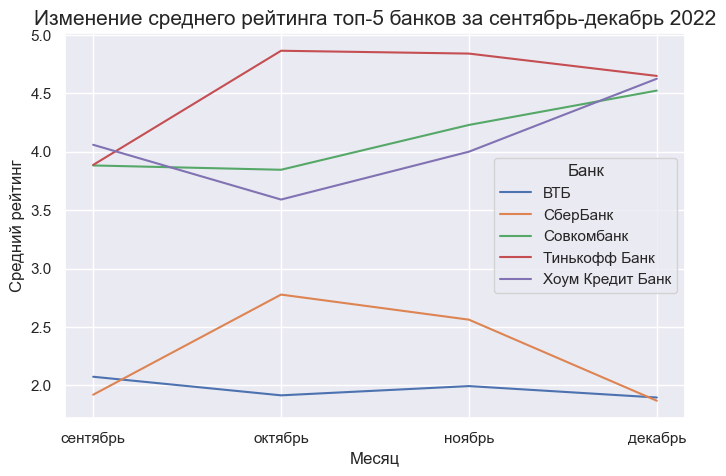

In [39]:
# Визуализируем изменение рейтингов с сентября по декабрь 2022

f, ax = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(x="year_month", y="rating", data=working_df, hue="bank_name")
ax.set_title('Изменение среднего рейтинга топ-5 банков за сентябрь-декабрь 2022', fontdict = { 'fontsize': 15}) # Добавляем название чарта
ax.set(xlabel='Месяц', ylabel='Средний рейтинг')  # Переименовываем оси
ax.set_xticklabels(['сентябрь', 'октябрь', 'ноябрь', 'декабрь'])  # Указываем названия месяцев по оси Х
ax.legend(title='Банк', loc='center right');  # Перемещаем легенду

## Нет ли в данных в целом каких-то странностей на ваш взгляд?

Ответ:
```
Отзывов на Тинькофф Банк -- почти половина от общего числа отзывов, и в октябре 2022 года наблюдается их аномальный всплеск. Он длился примерно с 26 октября по 8 ноября с максимальным пиком 27 октября, когда было создано более 7 тыс. отзывов.
Также был обнаружен скачок меньшей амплитуды для Хоум Кредит Банка 8-9 декабря 2022 года. За эти дни суммарно было создано 4670 отзывов при медианном значении для этого банка равном всего 17.5 отзывов в день.
```

In [55]:
print(
    'Отзывы на Тинькофф Банк составляют',
    '{:.1%}'.format(len(df[df['bank_name']=='Тинькофф Банк']) / len(df),2),
    'от общего количества отзывов в датасете'
    )

Отзывы на Тинькофф Банк составляют 48.4% от общего количества отзывов в датасете


In [57]:
# Переводим datetime отзыва в просто date
df['date'] = pd.to_datetime(df['date']).dt.date

In [258]:
# Создаем сводную таблицу, которая содержит информацию 
# только про топ-5 банков по кол-ву отзывов: 
# название банка, дата отзыва, количество отзывов

top_5_df = pd.pivot_table(
    data=df[df['bank_name'].isin(top_5.index)], 
    index='date', 
    columns='bank_name', 
    values='rating', 
    aggfunc='count'
)
top_5_df

bank_name,ВТБ,СберБанк,Совкомбанк,Тинькофф Банк,Хоум Кредит Банк
date,,,,,
2022-09-02,18,34,18,46,9
2022-09-03,16,19,14,45,3
2022-09-04,9,12,18,38,5
2022-09-05,18,22,25,63,7
2022-09-06,25,25,31,41,10
...,...,...,...,...,...
2022-12-30,34,37,100,131,73
2022-12-31,19,22,50,54,45
2023-01-01,9,8,10,37,3


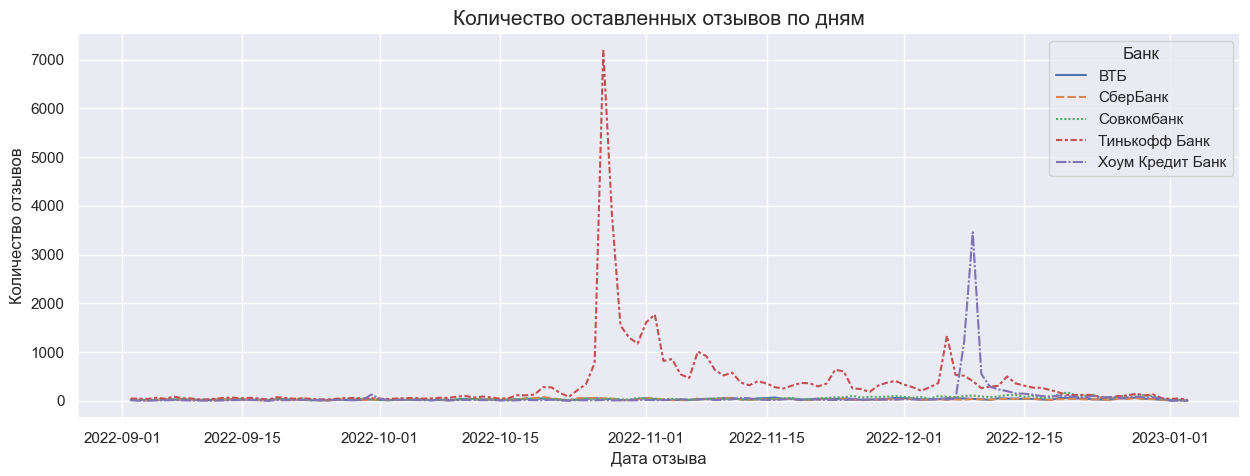

In [259]:
# Визуализируем, сколько отзывов получали банки каждый день
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(data=top_5_df)
ax.set_title('Количество оставленных отзывов по дням', fontdict = {'fontsize': 15});
ax.set(xlabel='Дата отзыва', ylabel='Количество отзывов')  # Переименовываем оси
ax.legend(title='Банк', loc='upper right');  # Перемещаем легенду

In [272]:
# Нормализуем данные в каждом столбце и оставляем только отзывы, 
# созданные с 15 октября по 20 декабря: 
# примерно тогда наблюдаются резкие скачки для обоих банков

top_5_df_norm=(top_5_df-top_5_df.mean())/top_5_df.std() # Используем Z-преобразование
date_mask = (pd.to_datetime('2022-10-15')<top_5_df_norm.index) & (top_5_df_norm.index<pd.to_datetime('2022-12-20')) # Создаем маску, где ограничиваем дату отзыва
top_5_df_norm = top_5_df_norm.loc[date_mask]
top_5_df_norm

bank_name,ВТБ,СберБанк,Совкомбанк,Тинькофф Банк,Хоум Кредит Банк
date,,,,,
2022-10-16,-0.327113,-0.690918,-0.743458,-0.394822,-0.209187
2022-10-17,0.083295,-0.086517,-0.529136,-0.318648,-0.197075
2022-10-18,0.767308,1.500035,-0.161729,-0.322521,-0.181934
2022-10-19,0.562104,1.651135,-0.314815,-0.300573,-0.191018
2022-10-20,1.314519,3.766538,-0.192346,-0.104328,-0.200103
...,...,...,...,...,...
2022-12-15,0.562104,1.424485,1.093582,-0.066887,0.214755
2022-12-16,0.698907,0.895634,1.583459,-0.118530,0.154192
2022-12-17,-0.053507,-0.162067,0.236297,-0.123694,0.066375


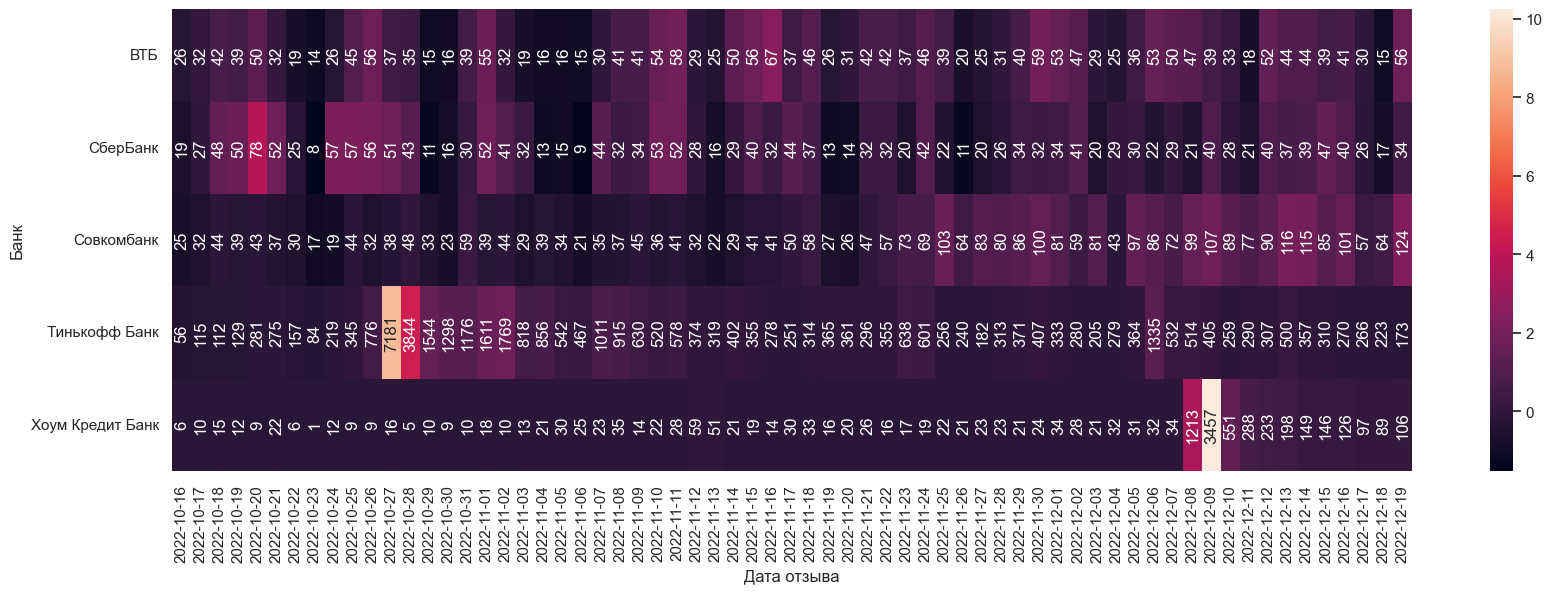

In [299]:
# И визуализируем
f, ax = plt.subplots(figsize=(20,6))
ax = sns.heatmap(data=top_5_df_norm.transpose(),annot=top_5_df.loc[date_mask].transpose(),fmt='g', annot_kws={'rotation': 90})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Дата отзыва', ylabel='Банк');  # Переименовываем оси

## [Дополнительный EDA](#Дополнительный-EDA)

```
В ходе дополнительного EDA обнаружилось, что некоторые отзывы повторяются, причем большинство -- положительные и оставлены для Тинькофф Банка в период описанной выше аномалии.
```

In [ ]:
# Создаем столбец body_cleaned, куда сложим отзывы, очищенные от html-тегов

import html
df['body_cleaned'] = df['body'].apply(html.unescape)
df['body_cleaned'].replace('</?p>','',regex=True, inplace=True)
df['body_cleaned']

In [579]:

df['body_length'] = df['body_cleaned'].str.len()
df.sort_values(by=['body_length'])

,body,title,rating,bank_name,date,body_cleaned,body_length
41144,"&lt;p&gt;My job is traveling, I&#039;m on whee...",Бонус,5,Тинькофф Банк,2022-11-14 21:38:00,,0
20287,&lt;p&gt;!!!!!!!!!!!!!!!!!!!!!!!!!!!! &#039;(&...,"Хороший банк, пользуюсь не первый год!!!!",5,Хоум Кредит Банк,2022-12-09 10:05:25,,0
15513,Всё ок!,Отлично,5,Совкомбанк,2022-12-11 05:41:55,Всё ок!,7
54696,Долго,Долго,1,Авангард,2022-11-01 23:51:16,Долго,8
50820,Банк супер,Банк супер,5,Хоум Кредит Банк,2022-11-04 15:12:37,Банк супер,11
...,...,...,...,...,...,...,...
91168,"Совершил [s]по[/s]пытку регистрации ИП, посред...",Это моя наихудшая попытка стать клиентом того ...,2,Точка,2022-09-07 17:19:47,"Совершил [s]по[/s]пытку регистрации ИП, посред...",3635
92705,Оспаривание операции в Тинькофф может не закон...,Обслуживание дебетовых карт,1,Тинькофф Банк,2022-09-02 12:32:41,Оспаривание операции в Тинькофф может не закон...,3640
89536,22 мая 2022 года мне позвонили из Банка Тинько...,Операция по блокировке карты,1,Росбанк,2022-09-13 11:43:05,22 мая 2022 года мне позвонили из Банка Тинько...,3644
84422,Являюсь премиальным клиентом банка. 06.09.2022...,Банк предлагает партнеров с низким качеством р...,1,Тинькофф Банк,2022-09-30 10:16:48,Являюсь премиальным клиентом банка. 06.09.2022...,3646


In [576]:
# Выводим отзывы, где не нашлось ни одной русской буквы

pd.set_option('display.max_colwidth', None) # Снимаем ограничение с длины строки, чтобы можно было прочитать отзыв полностью

# нашлась пара выбивающихся отзывов: один похож на секретный код или ASCII art, второй -- просто отзыв на английском языке
df[df['body_length']==0]

,body,title,rating,bank_name,date,body_cleaned,body_length
20287,&lt;p&gt;!!!!!!!!!!!!!!!!!!!!!!!!!!!! &#039;(&amp;7_(&amp;)&amp;(:(&#039;(&#039;):8/8-_57/?=9(!??==)?+%9=)!//--:&#039;&#039;&#039;₽₽₽_&#039;(/&#039;_&amp;7:)8(::&amp;4_/=)/:_6(/)=/-7:)/=!=/))!==/()8)((_&amp;4&amp;)/!%(&#039;₽47-/)08_&#039;_6(/=09_&amp;3&amp;:(8)/&#039;₽3&amp;/)0(:_6-!=9(:::___!)))==__-8(_&amp;5-7(-----_-_₽₽3_:(8₽*((&amp;46)/:&amp;&amp;-)(:&amp;&amp;6(-:₽34-/=09_₽356/87₽4)!0/45!9_&#039;5-)9__47(/_&amp;&amp;__()!)))))))))!!!! &lt;/p&gt;,"Хороший банк, пользуюсь не первый год!!!!",5,Хоум Кредит Банк,2022-12-09 10:05:25,,0
41144,"&lt;p&gt;My job is traveling, I&#039;m on wheels almost always and for me such a map is the most optimal. Although my wife has the same card for a long time and she travels like everyone else from work to work, but it also turns out to be normal. We try to use the card everywhere, so that bonuses accumulate)) &lt;/p&gt;\r\n&lt;p&gt;&lt;/p&gt;\r\n&lt;p&gt;There was a problem recently, they took a laptop to my son, I couldn&#039;t pay, I try it once, twice, it doesn&#039;t pass, there is money on the card, I wrote to the chat saying what is the problem and they tell me you have a limit set, and I don&#039;t remember what I put it on. But maybe I did, I won&#039;t say anything. They took it off and everything went OK, I paid. &lt;/p&gt;\r\n&lt;p&gt;&lt;/p&gt;\r\n&lt;p&gt;I was a little nervous, but then the bonuses for the month came good and let go immediately)) If you judge sensibly, then I did not have a more profitable punishment, there are really a lot of bonuses and not useless. And at the same time, I have all the payments without commission.&lt;/p&gt;",Бонус,5,Тинькофф Банк,2022-11-14 21:38:00,,0


In [554]:
# Отмечаем все повторяющиеся отзывы как True

df.drop([20287], inplace=True) # Удаляем неинформативный отзыв от Хоум Кредит Банка, чтобы он не считался за дубль дальше
df['if_duplicate'] = df.duplicated(['body_cleaned'], keep=False)
df.head()

,body,title,rating,bank_name,date,if_duplicate,body_cleaned,body_length
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03,False,Добрый деньпишу сюда для более скорого разреше...,472
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03,False,"При возврате просроченной задолженности, банк ...",411
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03,False,07.09.22 ю была оформлена кредитная карта 120 ...,1114
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03,False,Новый год начинается с приятностей)Никогда не ...,900
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03,False,Увидела на сайте Газпромбанка акцию с бонусом ...,501


In [555]:
# Создаем новый датафрейм, где хранятся только повторяющиеся отзывы

dupes_df = df[df['if_duplicate']==True]
dupes_df.head()

,body,title,rating,bank_name,date,if_duplicate,body_cleaned,body_length
70,&lt;p&gt;Я являюсь обманутым участником акции ...,Обман,1,Банк Открытие,2023-01-02,True,Я являюсь обманутым участником акции Приведи д...,328
260,&lt;p&gt;Я являюсь обманутым участником акции ...,Акция &quot;Приведи друга&quot;,1,Банк Открытие,2023-01-01,True,Я являюсь обманутым участником акции Приведи д...,328
304,&lt;p&gt;Здравствуйте🙂Хочу поблагодарить Совко...,Быстрое решение моего вопроса по кредиту плюс ...,5,Совкомбанк,2023-01-01,True,Здравствуйте🙂Хочу поблагодарить Совкомбанк за ...,744
305,&lt;p&gt;Здравствуйте🙂Хочу поблагодарить Совко...,Быстрое решение моего вопроса по кредиту плюс ...,5,Совкомбанк,2023-01-01,True,Здравствуйте🙂Хочу поблагодарить Совкомбанк за ...,744
306,&lt;p&gt;Здравствуйте🙂Хочу поблагодарить Совко...,Быстрое решение моего вопроса по кредиту плюс ...,5,Совкомбанк,2023-01-01,True,Здравствуйте🙂Хочу поблагодарить Совкомбанк за ...,744


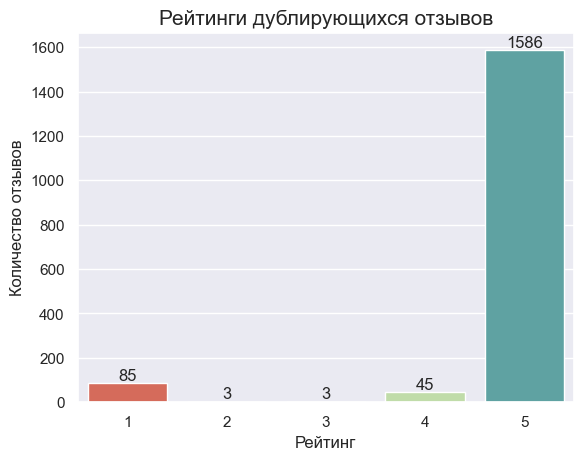

In [557]:
# Визуализируем рейтинг повторяющихся отзывов

f, ax = plt.subplots()
ax = sns.countplot(data=dupes_df, x="rating", palette="Spectral")
ax.set_title('Рейтинги дублирующихся отзывов', fontdict = { 'fontsize': 15}) # Добавляем название чарта
ax.bar_label(ax.containers[0])
ax.set(xlabel='Рейтинг', ylabel='Количество отзывов');  # Переименовываем оси

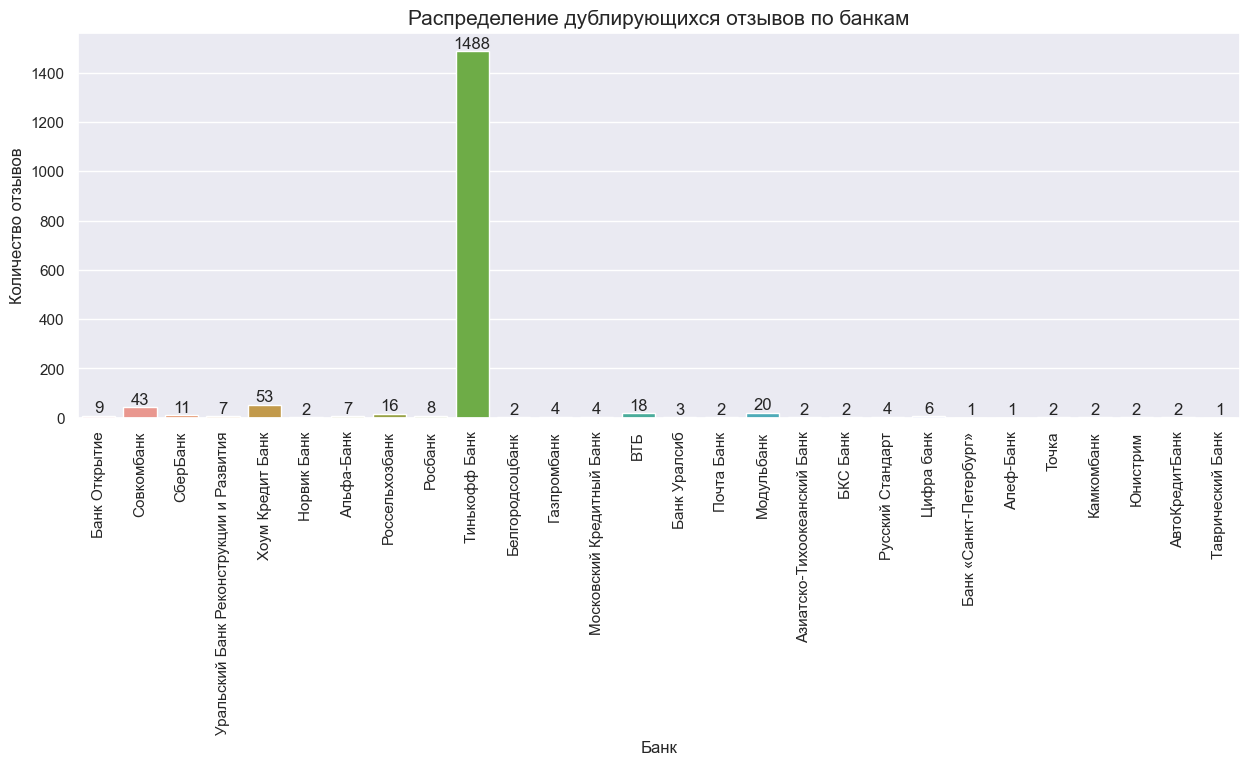

In [558]:
# Визуализируем рейтинг повторяющихся отзывов

f, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data=dupes_df, x="bank_name")
ax.set_title('Распределение дублирующихся отзывов по банкам', fontdict = { 'fontsize': 15}) # Добавляем название чарта
ax.bar_label(ax.containers[0]) # Добавляем подписи к столбцам
plt.xticks(rotation=90) # Поворачиваем названия банков, чтобы они не перекрывали друг друга
ax.set(xlabel='Банк', ylabel='Количество отзывов');  # Переименовываем оси

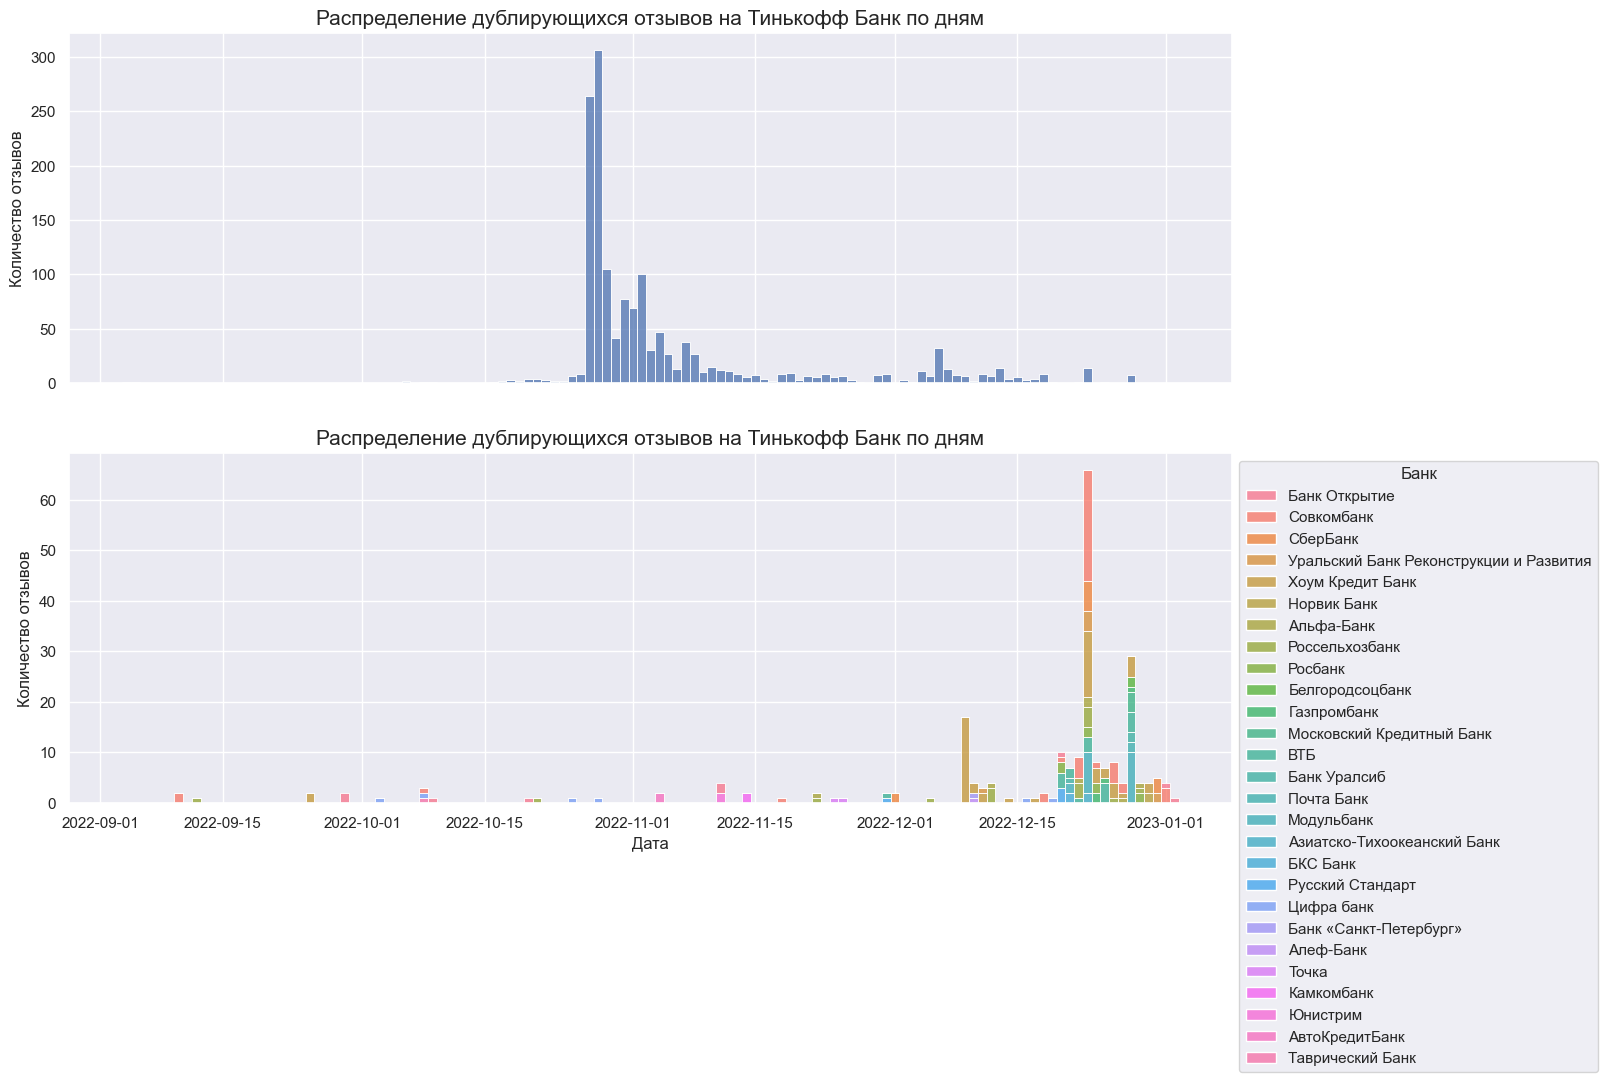

In [559]:
# Визуализируем распределение повторяющихся отзывов по дням

f, axs = plt.subplots(figsize=(15,10), nrows=2, sharex=True)

axs[0] = sns.histplot(data=dupes_df[dupes_df['bank_name']=='Тинькофф Банк'], x="date", ax=axs[0])
axs[0].set_title('Распределение дублирующихся отзывов на Тинькофф Банк по дням', fontdict = { 'fontsize': 15}) # Добавляем название чарта
axs[0].bar_label(axs[0].containers[0]) # Добавляем подписи к столбцам
axs[0].set(ylabel='Количество отзывов');  # Переименовываем оси

axs[1] = sns.histplot(data=dupes_df[dupes_df['bank_name']!='Тинькофф Банк'], x="date", hue='bank_name', ax=axs[1], multiple="stack")
axs[1].set_title('Распределение дублирующихся отзывов на другие банки по дням', fontdict = { 'fontsize': 15}) # Добавляем название чарта
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1, 1), title='Банк')
axs[1].set(xlabel='Дата', ylabel='Количество отзывов');  # Переименовываем оси

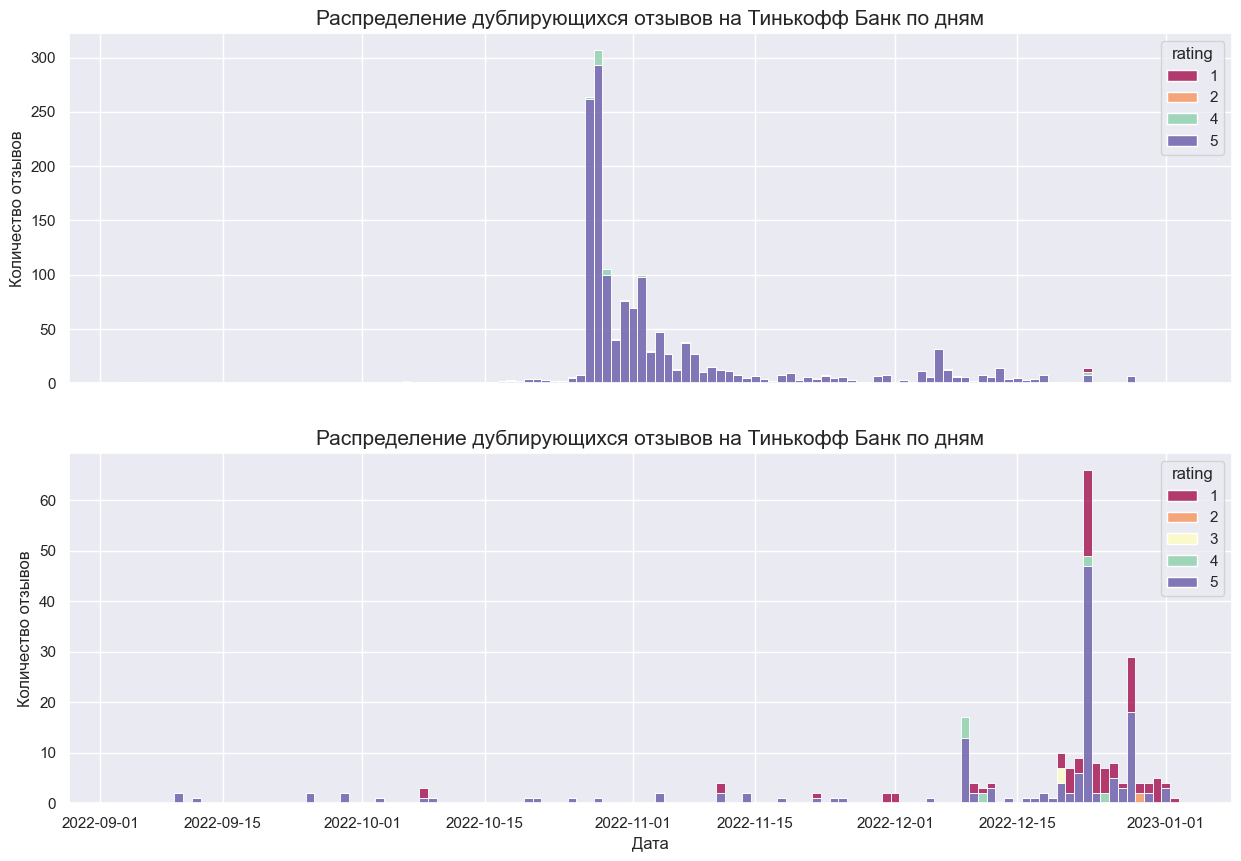

In [560]:
# Визуализируем распределение повторяющихся отзывов по дням

f, axs = plt.subplots(figsize=(15,10), nrows=2, sharex=True)

axs[0] = sns.histplot(data=dupes_df[dupes_df['bank_name']=='Тинькофф Банк'], x="date", ax=axs[0], hue='rating', multiple="stack", palette='Spectral')
axs[0].set_title('Рейтинги дублирующихся отзывов на Тинькофф Банк по дням', fontdict = { 'fontsize': 15}) # Добавляем название чарта
axs[0].set(ylabel='Количество отзывов');  # Переименовываем оси

axs[1] = sns.histplot(data=dupes_df[dupes_df['bank_name']!='Тинькофф Банк'], x="date", hue='rating', ax=axs[1], multiple="stack", palette='Spectral')
axs[1].set_title('Рейтинги дублирующихся отзывов на другие банки по дням', fontdict = { 'fontsize': 15}) # Добавляем название чарта
axs[1].set(xlabel='Дата', ylabel='Количество отзывов');  # Переименовываем оси

In [561]:
# Посмотрим, есть ли повторяющиеся отзывы для разных банков

 # Создаем сводную таблицу, где для каждого отзыва будут фиксироваться банки, к которым они относятся
pt = pd.pivot_table(
    data=dupes_df, 
    index='body', 
    columns='bank_name', 
    values='rating', 
    aggfunc='count'
)
pt['banks'] = (pt.notnull() * pt.columns.to_series()).apply(','.join,axis=1).str.replace(',,', '').str.strip(',')

In [562]:
# Получаем банки, которые имеют одинаковые отзывы, сами отзывы и их оценки

pt = pt.merge(
    dupes_df.groupby('body')['rating'].mean(),
    left_index=True,
    right_index=True
)

pt[pt['banks'].str.contains(',')].reset_index()[['body', 'rating', 'banks']]

,body,rating,banks
0,"&lt;p&gt;В банке оформлял зарплатную карту, со...",5.0,"Россельхозбанк,Совкомбанк"
1,&lt;p&gt;Данный банк постоянно названивает со ...,1.0,"ВТБ,Русский Стандарт"
2,&lt;p&gt;Запрашивала перевод стягиванием на ка...,1.0,"Совкомбанк,Таврический Банк"
3,&lt;p&gt;Как и многие другие повелся на акцию ...,1.0,"Алеф-Банк,Альфа-Банк"
4,"&lt;p&gt;Летом собиралась в отпуск, понадобили...",5.0,"Россельхозбанк,Тинькофф Банк"
5,&lt;p&gt;На электронную почту поступило предло...,1.0,"Банк Уралсиб,Тинькофф Банк"
6,&lt;p&gt;Не начислен в полной мере кэшбэк за о...,1.0,"Банк «Санкт-Петербург»,Уральский Банк Реконстр..."
7,&lt;p&gt;Снимал деньги через банкомат альфа ба...,1.0,"Альфа-Банк,Тинькофф Банк"
